<a href="https://colab.research.google.com/github/kivvgsr/Oasis-Infobyte-tasks/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IRIS FLOWER CLASSIFICATION


Laptop with Browser Icon

Iris flower has three species; setosa, versicolor, and virginica, which differs according to their
measurements. Now assume that you have the measurements of the iris flowers according to
their species, and here your task is to train a machine learning model that can learn from the
measurements of the iris species and classify them.



### this give the info of first five rows

In [108]:

# Install the gdown library
!pip install gdown

# Define the direct download link from your Google Drive
file_id = "1bWD7wxSE6GUA9mIQy8sWpsHc8_Pqk_xr"
url = f"https://drive.google.com/uc?id={file_id}"

# Define the local file path where you want to save the dataset
output_path = "/content/dataset.csv"

# Download the dataset using gdown
import gdown
gdown.download(url, output_path, quiet=False)
encoding = "ISO-8859-1"

# Now you can read the dataset using pandas or any other relevant library
import pandas as pd
df = pd.read_csv(output_path,encoding=encoding)


Downloading...
From: https://drive.google.com/uc?id=1bWD7wxSE6GUA9mIQy8sWpsHc8_Pqk_xr
To: /content/dataset.csv
100%|██████████| 5.11k/5.11k [00:00<00:00, 9.17MB/s]


In [109]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### .info( ) will give the info about no of columns and is there any null values present .

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [111]:
df.value_counts()

Id   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species        
1    5.1            3.5           1.4            0.2           Iris-setosa        1
95   5.6            2.7           4.2            1.3           Iris-versicolor    1
97   5.7            2.9           4.2            1.3           Iris-versicolor    1
98   6.2            2.9           4.3            1.3           Iris-versicolor    1
99   5.1            2.5           3.0            1.1           Iris-versicolor    1
                                                                                 ..
51   7.0            3.2           4.7            1.4           Iris-versicolor    1
52   6.4            3.2           4.5            1.5           Iris-versicolor    1
53   6.9            3.1           4.9            1.5           Iris-versicolor    1
54   5.5            2.3           4.0            1.3           Iris-versicolor    1
150  5.9            3.0           5.1            1.8           Iris-virginica    

### .describe() will give the statistical information about the data set that we took.

In [112]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### lets c how many columns are there in the data set

In [113]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## from the above syntax we get to know that there are only three unique values those are iris - setosa , iris - versicolor , iris - viriginica .

##**pre-processes of the Data**

In [114]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [115]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### there are no null values in the data frame

In [116]:
df.shape

(150, 6)

### there are totally 150 rows and 6 columns are present in the data frame .

In [117]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

##**lets perform some visualization**

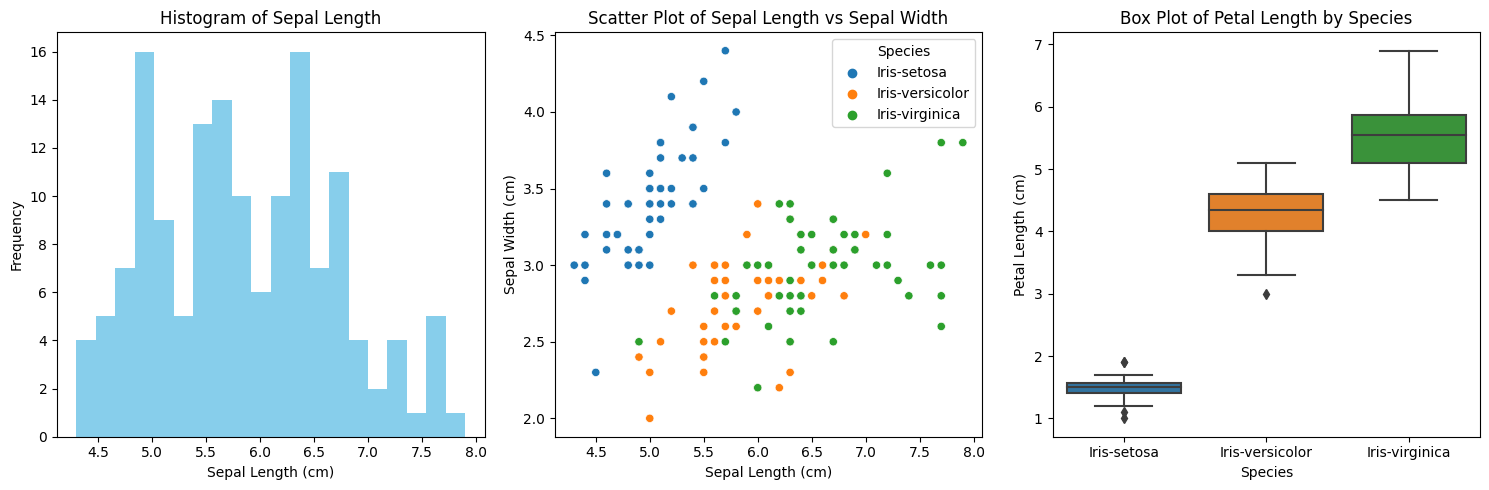

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots with multiple rows and columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot 1: Histogram for Sepal Length
axes[0].hist(df['SepalLengthCm'], bins=20, color='skyblue')
axes[0].set_xlabel('Sepal Length (cm)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Sepal Length')

# Plot 2: Scatter Plot for Sepal Length vs Sepal Width
sns.scatterplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species', ax=axes[1])
axes[1].set_xlabel('Sepal Length (cm)')
axes[1].set_ylabel('Sepal Width (cm)')
axes[1].set_title('Scatter Plot of Sepal Length vs Sepal Width')

# Plot 3: Box Plot for Petal Length by Species
sns.boxplot(data=df, x='Species', y='PetalLengthCm', ax=axes[2])
axes[2].set_xlabel('Species')
axes[2].set_ylabel('Petal Length (cm)')
axes[2].set_title('Box Plot of Petal Length by Species')

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the subplots
plt.show()


In [119]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()

# Fit and transform the "Species" column in your DataFrame
df['Species'] = label_encoder.fit_transform(df['Species'])



### The mapping:
### Iris-setosa will be encoded as 0
### Iris-versicolor will be encoded as 1
### Iris-virginica will be encoded as 2


In [120]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


### to chwck whether the mapping is correct we can use this code :

In [121]:
df['Original_Species'] = label_encoder.inverse_transform(df['Species'])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Original_Species
0,1,5.1,3.5,1.4,0.2,0,Iris-setosa
1,2,4.9,3.0,1.4,0.2,0,Iris-setosa
2,3,4.7,3.2,1.3,0.2,0,Iris-setosa
3,4,4.6,3.1,1.5,0.2,0,Iris-setosa
4,5,5.0,3.6,1.4,0.2,0,Iris-setosa


In [122]:
import matplotlib.pyplot as plt
%matplotlib inline

In [123]:
df0 =df[df.Species == 0]
df1 =df[df.Species == 1]
df2 =df[df.Species == 2]

In [124]:
df0.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Original_Species
0,1,5.1,3.5,1.4,0.2,0,Iris-setosa
1,2,4.9,3.0,1.4,0.2,0,Iris-setosa
2,3,4.7,3.2,1.3,0.2,0,Iris-setosa
3,4,4.6,3.1,1.5,0.2,0,Iris-setosa
4,5,5.0,3.6,1.4,0.2,0,Iris-setosa


In [125]:
df1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Original_Species
50,51,7.0,3.2,4.7,1.4,1,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,1,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,1,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,1,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,1,Iris-versicolor


In [126]:
df2.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Original_Species
100,101,6.3,3.3,6.0,2.5,2,Iris-virginica
101,102,5.8,2.7,5.1,1.9,2,Iris-virginica
102,103,7.1,3.0,5.9,2.1,2,Iris-virginica
103,104,6.3,2.9,5.6,1.8,2,Iris-virginica
104,105,6.5,3.0,5.8,2.2,2,Iris-virginica


Text(0, 0.5, 'SepalWidthCm')

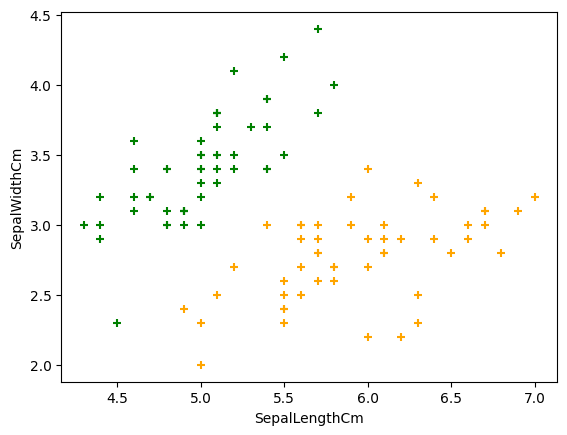

In [127]:

import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df0['SepalLengthCm'],df0['SepalWidthCm'],color='green',marker ='+')


plt.scatter(df1['SepalLengthCm'],df1['SepalWidthCm'],color='orange',marker ='+')


plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')

Text(0, 0.5, 'PetalWidthCm')

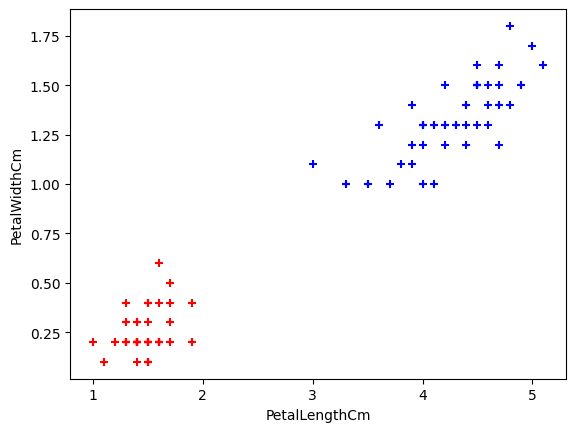

In [128]:

import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df0['PetalLengthCm'],df0['PetalWidthCm'],color='red',marker ='+')


plt.scatter(df1['PetalLengthCm'],df1['PetalWidthCm'],color='blue',marker ='+')


plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')

### this clearly a classification we can train our svm model very gud on this two data

##**lets divide the data for testing and training**

In [129]:
x = df.drop(['Species','Original_Species'],axis=1)
x.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [130]:
y = df.Species
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [131]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest =train_test_split(x,y,test_size=0.2)

### lets the length of xtrain and xtest

In [132]:
print("train",len(xtrain))
print('test',len(xtest))

train 120
test 30


In [133]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(xtrain,ytrain)

SVC(kernel='linear')

In [134]:
y_pred=model.predict(xtest)
y_pred

array([1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 0, 1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 2, 1, 0])

In [135]:
model.score(xtrain,ytrain)

1.0

In [136]:
model.score(xtest,ytest)

1.0

### hence our model is in guf gud prediction format.

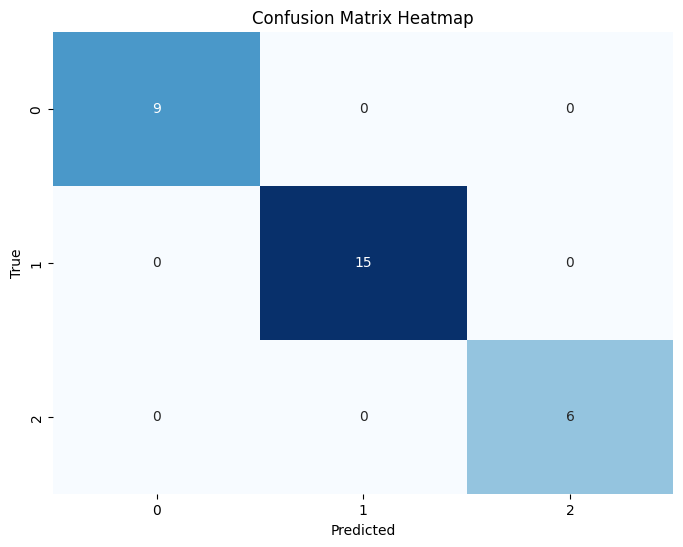

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# Assuming you have the true labels and predicted labels for testing data
true_labels = ytest  # Replace with actual true labels
predicted_labels = y_pred  # Replace with actual predicted labels

# Create a confusion matrix
confusion_matrix = confusion_matrix(true_labels, predicted_labels)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add labels and a title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')

# Show the plot
plt.show()


###  a confusion matrix heatmap, it is used to visualize the performance of a classification model:

**The mapping:**
1.  Iris-setosa will be encoded as 0
2.  Iris-versicolor will be encoded as 1
3.  Iris-virginica will be encoded as 2





From the above matrix we can say that : for **11 time the model predicted correctly for Iris-setosa** , and** 9 time it predicted correctly as Iris-versicolor**, and**10 time it predictly correctly as virginica**.

# THANK YOU .